In [1]:
import numpy as np
import pandas as pd

In [2]:
equity_etf = pd.read_csv('Data/IVV.csv')
gold_etf = pd.read_csv('Data/GLD.csv')
bitcoin = pd.read_csv('Data/BTC-USD.csv')
#Convert the data into the datetime format and make it the index to query the dataframe easier.
gold_etf["Date"] = pd.to_datetime(gold_etf["Date"], format="%Y-%m-%d")
gold_etf.set_index("Date", inplace=True)
equity_etf["Date"] = pd.to_datetime(equity_etf["Date"], format="%Y-%m-%d")
equity_etf.set_index("Date", inplace=True)
bitcoin["Date"] = pd.to_datetime(bitcoin["Date"], format="%Y-%m-%d")
bitcoin.set_index("Date", inplace=True)

In [3]:
gold_etf['Returns'] = np.log(gold_etf['Adj Close']/gold_etf['Adj Close'].shift(1))
equity_etf['Returns'] = np.log(equity_etf['Adj Close']/equity_etf['Adj Close'].shift(1))
bitcoin['Returns'] = np.log(bitcoin['Adj Close']/bitcoin['Adj Close'].shift(1))

In [104]:
gold_etf['Volatility'] = gold_etf['Returns'].rolling(window=50).std()*np.sqrt(252)
equity_etf['Volatility'] = equity_etf['Returns'].rolling(window=50).std()*np.sqrt(252)
bitcoin['Volatility'] = bitcoin['Returns'].rolling(window=50).std()*np.sqrt(252)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

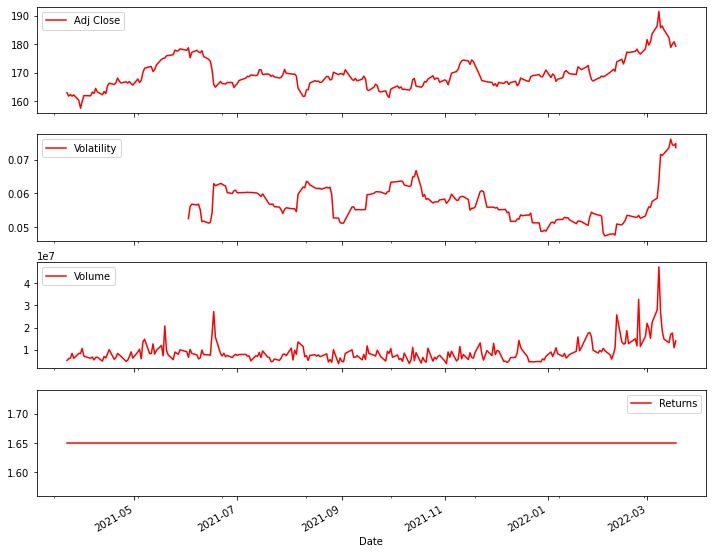

In [103]:
gold_etf[['Adj Close', 'Volatility','Volume', 'Returns']].plot(subplots=True, color='red', figsize=(12,10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

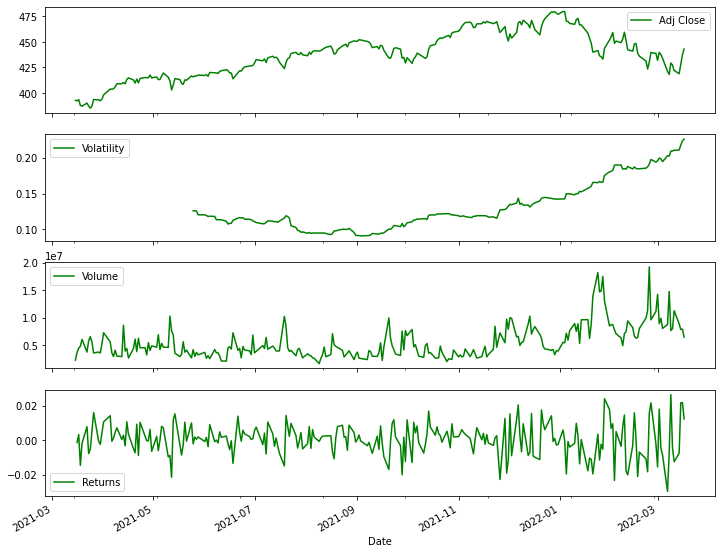

In [100]:
equity_etf[['Adj Close', 'Volatility', 'Volume','Returns']].plot(subplots=True, color='green', figsize=(12,10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

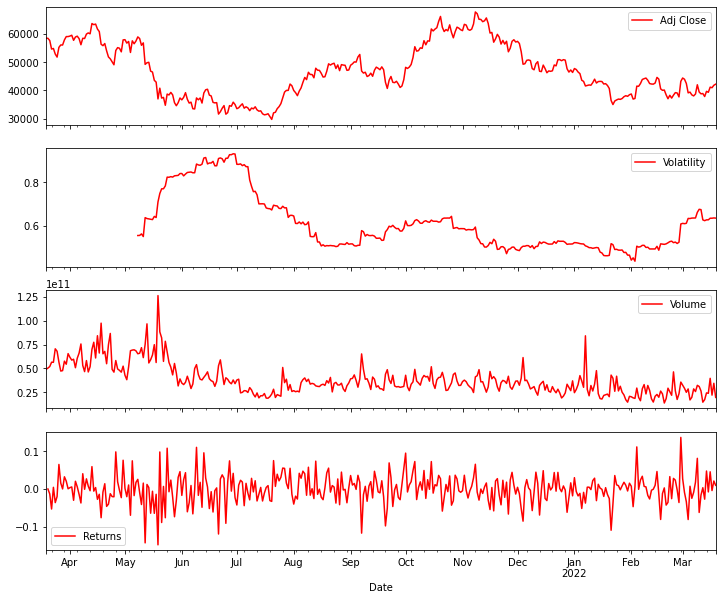

In [101]:
bitcoin[['Adj Close', 'Volatility', 'Volume', 'Returns']].plot(subplots=True, color='red', figsize=(12,10))

In [46]:
def sharpe(returns, rf, days=252):
    volatility = returns.std() * np.sqrt(days)
    sharpe_ratio = (returns.means() - rf)/ volatility
    return sharpe_ratio

In [80]:
# March 16, 2022   2.19%
rf = 0.0219
days=252

volatility = gold_etf.Returns.std() * np.sqrt(days)
gold_sharpe = (gold_etf['Returns'].mean() - rf)/ volatility
print('Gold ETF Sharpe Ratio : ' ,gold_sharpe)

volatility = equity_etf.Returns.std() * np.sqrt(days)
equity_sharpe = (equity_etf['Returns'].mean() - rf)/ volatility
print('Equity ETF Sharpe Ratio : ' ,equity_sharpe)

volatility = bitcoin.Returns.std() * np.sqrt(days)
bitcoin_sharpe = (bitcoin['Returns'].mean() - rf)/ volatility
print('Bitcoin ETF Sharpe Ratio : ' ,bitcoin_sharpe)

Gold ETF Sharpe Ratio :  -0.15822865857301227
Equity ETF Sharpe Ratio :  -0.14538888129136887
Bitcoin ETF Sharpe Ratio :  -0.03697928268644568
